# Inserción en Árboles AVL

Los Árboles AVL, nombrados así por sus inventores Adelson-Velsky y Landis, son árboles binarios de búsqueda (**BST**) **balanceados**. Esto significa que para cada nodo, las alturas de sus subárboles izquierdo y derecho difieren como máximo en 1. Este balanceo asegura que las operaciones de búsqueda, inserción y eliminación se realicen en **tiempo logarítmico** O(log n), donde (n) es el número de nodos en el árbol. La inserción en un Árbol AVL es un proceso que mantiene este balanceo después de agregar un nuevo elemento.

- **Concepto de Inserción en Árboles AVL:**
  - Inserta el nodo de manera similar a un árbol binario de búsqueda.
  - Recorre el camino de regreso al nodo raíz, actualizando las alturas.
  - Verifica el balance en cada nodo y realiza rotaciones simples o dobles según sea necesario.

- **Aplicaciones de la Inserción en Árboles AVL:**
  - Mantenimiento de diccionarios y bases de datos balanceadas.
  - Implementación eficiente de conjuntos ordenados.
  - Proporcionar acceso rápido a los elementos, garantizando operaciones en tiempo logarítmico.

- **Implementación en Python:**
  - La implementación implica una función que inserte el nodo y luego verifique y corrija el balanceo del árbol.

## Implementación en Python

A continuación se muestra una implementación típica de la inserción en un árbol AVL en Python:


In [50]:
# Código utilitario
from src.visualization import visualize_bt
from src.BST import BST

In [51]:
class Node:
    # Inicialización del nodo
    def __init__(self, data):
        self.data = data  # Dato almacenado en el nodo
        self.left = None  # Nodo hijo izquierdo
        self.right = None  # Nodo hijo derecho
        self.height = 1  # Altura del nodo (utilizada en AVL)

class AVLTree:
    # Inicialización del árbol AVL
    def __init__(self):
        self.root = None  # Raíz del árbol

    # Método para insertar un dato en el árbol
    def insert(self, data):
        if not self.root:  # Si el árbol está vacío
            self.root = Node(data)  # Crear el nodo raíz
        else:  # Si el árbol no está vacío
            self.root = self._insert(self.root, data)  # Insertar recursivamente

    # Método auxiliar para insertar nodos recursivamente
    def _insert(self, node, data):
        if not node:  # Si el nodo es nulo
            return Node(data)  # Retornar un nuevo nodo
        elif data < node.data:  # Si el dato a insertar es menor que el del nodo actual
            node.left = self._insert(node.left, data)  # Insertar en el subárbol izquierdo
        else:  # Si el dato a insertar es mayor o igual que el del nodo actual
            node.right = self._insert(node.right, data)  # Insertar en el subárbol derecho

        # Actualizar la altura del nodo actual
        node.height = 1 + max(self._get_height(node.left),
                              self._get_height(node.right))

        # Obtener el factor de balance del nodo actual
        balance = self._get_balance(node)

        # Caso: Desbalance Izquierda-Izquierda
        if balance > 1 and data < node.left.data:
            return self._rotate_right(node)
        # Caso: Desbalance Derecha-Derecha
        if balance < -1 and data > node.right.data:
            return self._rotate_left(node)
        # Caso: Desbalance Izquierda-Derecha
        if balance > 1 and data > node.left.data:
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)
        # Caso: Desbalance Derecha-Izquierda
        if balance < -1 and data < node.right.data:
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        # Retornar el nodo con factores de equilibrio actualizados
        return node

    # Método para obtener la altura de un nodo
    def _get_height(self, node):
        if not node:  # Si el nodo es nulo
            return 0  # La altura es 0
        return node.height  # Retornar la altura

    # Método para obtener el factor de balance de un nodo
    def _get_balance(self, node):
        if not node:  # Si el nodo es nulo
            return 0  # El factor de balance es 0
        return self._get_height(node.left) - self._get_height(node.right)

    # Método para realizar una rotación a la izquierda
    def _rotate_left(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        # Actualizar las alturas
        z.height = 1 + max(self._get_height(z.left),
                           self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left),
                           self._get_height(y.right))

        # Retornar la nueva raíz después de la rotación
        return y

    # Método para realizar una rotación a la derecha
    def _rotate_right(self, z):
        y = z.left
        T3 = y.right

        y.right = z
        z.left = T3

        # Actualizar las alturas
        z.height = 1 + max(self._get_height(z.left),
                           self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left),
                           self._get_height(y.right))

        # Retornar la nueva raíz después de la rotación
        return y

## Pruebas de Inserción en Árboles AVL

Para verificar la correcta inserción y el balanceo en un árbol AVL, podemos insertar varios elementos tanto en un BST como en un AVL y ver como se diferencian

BST


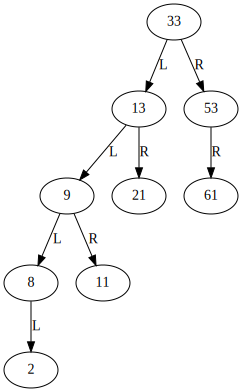

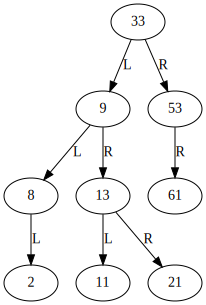

In [52]:
# Data para comparar insercion en y AVL
keys = [33, 13, 53, 9, 21, 61, 8, 11, 2]

# Crear un árbol BST y realizar inserciones
tree = BST()
for data in keys:
    root = tree.insert(data)

# Visualizar el árbol BST
dot = visualize_bt(tree)
print("BST")
display(dot)

# Crear un árbol AVL e insertar elementos
avl_tree = AVLTree()
for data in keys:
    root = avl_tree.insert(data)

# Visualizar el árbol AVL
dot = visualize_bt(avl_tree)
print
display(dot)

## Complejidad del Algoritmo

- **Complejidad Temporal:** La inserción en un árbol AVL tiene una complejidad de tiempo O(log n), ya que en el peor caso, se realiza un número de operaciones proporcional a la altura del árbol.
- **Complejidad Espacial:** La complejidad espacial de la inserción es O(1) si no consideramos el espacio utilizado por el propio nodo insertado, ya que solo se necesita espacio adicional constante para los punteros y las variables temporales durante la operación.

## Ejercicios Prácticos

1. Implementa una función en Python que construya un árbol AVL a partir de una lista desordenada de elementos y luego imprima los niveles del árbol.
2. Escribe un programa en Python que inserte elementos en un árbol AVL y luego lo recorra en orden, preorden y postorden, imprimiendo los valores de los nodos.

## Soluciones

Aquí están las soluciones detalladas para los ejercicios prácticos propuestos sobre la inserción en árboles AVL:

In [53]:
#### Ejercicio 1: Construir un Árbol AVL desde una Lista Desordenada

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, data):
        if not self.root:
            self.root = Node(data)
        else:
            self.root = self._insert(self.root, data)

    def _insert(self, node, data):
        if not node:
            return Node(data)
        elif data < node.data:
            node.left = self._insert(node.left, data)
        else:
            node.right = self._insert(node.right, data)

        node.height = 1 + max(self._get_height(node.left),
                              self._get_height(node.right))

        balance = self._get_balance(node)

        if balance > 1 and data < node.left.data:
            return self._rotate_right(node)
        if balance < -1 and data > node.right.data:
            return self._rotate_left(node)
        if balance > 1 and data > node.left.data:
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)
        if balance < -1 and data < node.right.data:
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        return node

    def _get_height(self, node):
        if not node:
            return 0
        return node.height

    def _get_balance(self, node):
        if not node:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def _rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self._get_height(z.left),
                           self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left),
                           self._get_height(y.right))
        return y

    def _rotate_right(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self._get_height(z.left),
                           self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left),
                           self._get_height(y.right))
        return y

    def print_levels(self):
        if not self.root:
            return
        queue = [self.root]
        while queue:
            level_size = len(queue)
            for i in range(level_size):
                node = queue.pop(0)
                print(node.data, end=" ")
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            print()

# Implementación
def build_avl_from_list(lst):
    avl_tree = AVLTree()
    for item in lst:
        avl_tree.insert(item)
    avl_tree.print_levels()

# Ejemplo de uso
unsorted_list = [10, 1, 3, 5, 7, 9, 2]
build_avl_from_list(unsorted_list)

7 
3 10 
1 5 9 
2 


In [54]:
#### Ejercicio 2: Inserción y Recorridos en un Árbol AVL

def print_in_order(node):
    if node:
        print_in_order(node.left)
        print(node.data, end=" ")
        print_in_order(node.right)

def print_pre_order(node):
    if node:
        print(node.data, end=" ")
        print_pre_order(node.left)
        print_pre_order(node.right)

def print_post_order(node):
    if node:
        print_post_order(node.left)
        print_post_order(node.right)
        print(node.data, end=" ")

# Utilizando la clase AVLTree definida previamente
elements = [10, 1, 3, 5, 7, 9, 2]
avl_tree = AVLTree()
for element in elements:
    avl_tree.insert(element)

print("In-order traversal:")
print_in_order(avl_tree.root)
print("\nPre-order traversal:")
print_pre_order(avl_tree.root)
print("\nPost-order traversal:")
print_post_order(avl_tree.root)

In-order traversal:
1 2 3 5 7 9 10 
Pre-order traversal:
7 3 1 2 5 10 9 
Post-order traversal:
2 1 5 3 9 10 7 

Estos códigos solucionan los ejercicios propuestos, implementando las funcionalidades solicitadas y demostrando el uso de árboles AVL para insertar elementos de una lista desordenada, así como para realizar recorridos en orden, preorden, y postorden.